## Random Forest & Logistic Regression

Columns in dataset: ['Time', 'Date', 'Sender_account', 'Receiver_account', 'Amount', 'Payment_currency', 'Received_currency', 'Sender_bank_location', 'Receiver_bank_location', 'Payment_type', 'Is_laundering', 'Laundering_type']
       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  07/10/2022      8724731955        2769355426   1459.15   
1  10:35:20  07/10/2022      1491989064        8401255335   6019.64   
2  10:35:20  07/10/2022       287305149        4404767002  14328.44   
3  10:35:21  07/10/2022      5376652437        9600420220  11895.00   
4  10:35:21  07/10/2022      9614186178        3803336972    115.25   

  Payment_currency Received_currency Sender_bank_location  \
0        UK pounds         UK pounds                   UK   
1        UK pounds            Dirham                   UK   
2        UK pounds         UK pounds                   UK   
3        UK pounds         UK pounds                   UK   
4        UK pounds         UK pounds    

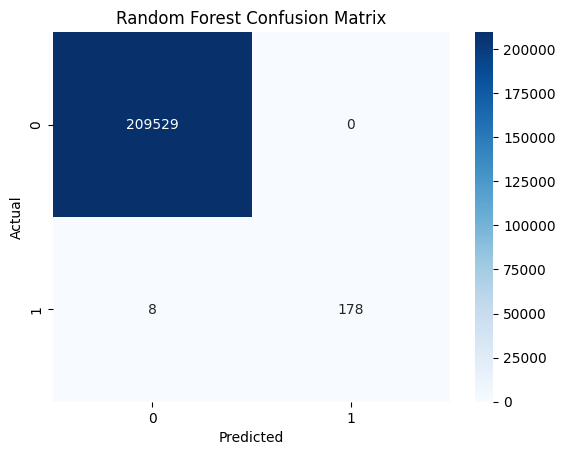

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209529
           1       0.00      0.00      0.00       186

    accuracy                           1.00    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715



/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/macbookpro/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [3]:
# --- Import libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load the dataset ---
data = pd.read_csv("SAML-D.csv")

# --- Quick check of columns and head ---
print("Columns in dataset:", data.columns.tolist())
print(data.head())

# --- Fill missing values ---
data.fillna(0, inplace=True)

# --- Combine 'Date' and 'Time' into datetime and extract useful features ---
data["Datetime"] = pd.to_datetime(data["Date"] + " " + data["Time"], errors='coerce')
data["Hour"] = data["Datetime"].dt.hour
data["DayOfWeek"] = data["Datetime"].dt.dayofweek
data["Month"] = data["Datetime"].dt.month

# --- Drop original time columns ---
data.drop(["Time", "Date", "Datetime"], axis=1, inplace=True)

# --- Define features and target ---
X = data.drop("Is_laundering", axis=1)
y = data["Is_laundering"]

# --- One-hot encode categorical columns ---
categorical_cols = ["Payment_currency", "Received_currency", "Sender_bank_location", 
                    "Receiver_bank_location", "Payment_type", "Laundering_type"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# --- Fill any new NaNs caused during processing ---
X = X.fillna(0)

# --- Split dataset ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- Model 1: Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

# --- Confusion Matrix for Random Forest ---
conf_matrix_rf = confusion_matrix(y_test, rf_preds)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Model 2: Logistic Regression ---
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))


In [5]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the LightGBM model
lgbm_model = lgb.LGBMClassifier(
    objective='binary',          # Binary classification task
    class_weight='balanced',     # Handle class imbalance
    metric='binary_logloss',     # Use binary logloss for evaluation
    boosting_type='gbdt',        # Gradient boosting decision trees
    n_estimators=1000,           # Number of trees
    learning_rate=0.05,          # Learning rate
    max_depth=-1,                # Max depth of the tree
    num_leaves=31,               # Number of leaves in each tree
    subsample=0.8,               # Fraction of data used for each tree
    colsample_bytree=0.8         # Fraction of features used for each tree
)

# Fit the model
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred = lgbm_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


ModuleNotFoundError: No module named 'lightgbm'